# LM35 mesured data analysis
## Internet of Things

Author:        Efren Del Real Frias

File Name:     tempDataAnalysis.ipynb

Date:          December 02nd 2022

NOTE:



# 1.- Python Modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2.- Working Directory

Note: As I am working with Google Colab,  I have to move to my working directory. Since there is my measured temperature data in a *.csv file.
Plese fell free to skip next steps if you are working in a local numpy notebook or other platform

In [4]:
!pwd

/content


In [5]:
!ls

sample_data


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls -l

total 8
drwx------ 6 root root 4096 Dec  1 16:33 drive
drwxr-xr-x 1 root root 4096 Nov 23 14:31 sample_data


In [9]:
%cd /content/drive/MyDrive/1_Master/3_Semester/2_IoT/221201_FinalProject/udgS3IoT/doc/01_csvAnalysis/

/content/drive/MyDrive/1_Master/3_Semester/2_IoT/221201_FinalProject/udgS3IoT/doc/01_csvAnalysis


In [10]:
!ls -l

total 528
-rw------- 1 root root 536404 Dec  1 16:21 221130_TemperatureData_v1.csv
-rw------- 1 root root   3997 Dec  1 16:35 tempDataAnalysis.ipynb


# 3.- Read *.csv as Pandas DataFrame

In [11]:
# Reads csv file as pandas dataFrame object
tempData_df = pd.read_csv( '221130_TemperatureData_v1.csv' )

In [13]:
tempData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28231 entries, 0 to 28230
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TimeStamp    28231 non-null  object
 1   Temperature  28231 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 441.2+ KB


In [19]:
# Since I  added a factor (100) before transmit data to Blynk service in order
# to avoid working with float data,  Temperature must translate in order to get
# °C
tempData_df.Temperature = tempData_df.Temperature / 100

In [20]:
tempData_df.head()

,TimeStamp,Temperature
0,10:25:01.218,10.80
1,10:25:04.213,11.05
2,10:25:07.205,10.93
3,10:25:10.198,10.74
4,10:25:13.226,10.89


# 4.- Plot measured data

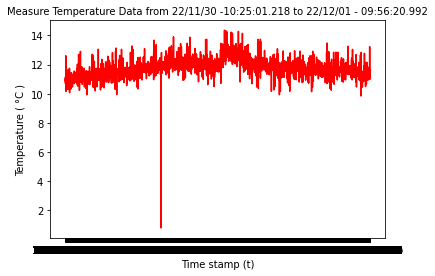

In [21]:
# Plots measured temperature data
plt.plot( tempData_df.TimeStamp, tempData_df.Temperature, color = 'red' )
plt.title( f'Measure Temperature Data from 22/11/30 -{ tempData_df.TimeStamp.iloc[0] } to 22/12/01 - { tempData_df.TimeStamp.iloc[-1] }', fontsize = 10)
plt.ylabel('Temperature ( °C )')
plt.xlabel('Time stamp (t)')
plt.show()